5 найбільших добових втрат БТР: [ 91  96 110 120 190]
Загальна кількість знищених БТР влітку 2023 року: 1126
Середнє значення знищених БТР за 100-500 днів війни: 20.67581047381546


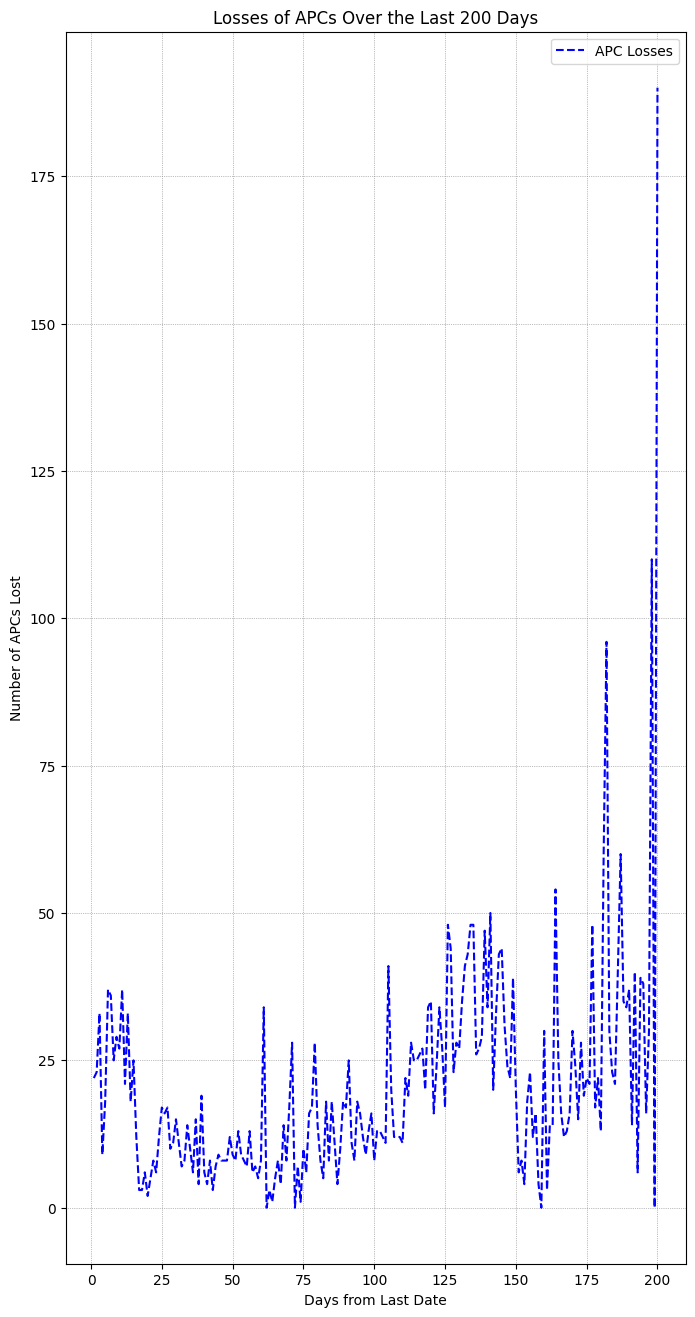

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Функція для завантаження стовпця з файлу CSV як масив numpy
def load_column_data(filename, column_name):
    with open(filename, mode='r', encoding='utf-8') as file:
        reader = csv.reader(file)
        headers = next(reader)  # Пропустити заголовки
        column_index = headers.index(column_name)  # Індекс потрібного стовпця
        column_data = [int(row[column_index]) for row in reader if row[column_index].isdigit()]  # Зчитування даних
    return np.array(column_data)

# 2. Завантаження стовпця «APC» (Armored personnel carrier) як numpy-масиву
apc_losses = load_column_data('russia_losses_equipment.csv', 'APC')

# 3. Обчислення добових втрат БТР (використання абсолютних значень)
daily_apc_losses = np.abs(np.diff(apc_losses))

# 4. Пошук 5 найбільших добових втрат БТР
top_5_losses = np.sort(daily_apc_losses)[-5:]
print("5 найбільших добових втрат БТР:", top_5_losses)

# 5. Підрахунок загальних втрат БТР влітку 2023 року з використанням абсолютних значень
def summer_2023_losses(filename, column_name):
    with open(filename, mode='r', encoding='utf-8') as file:
        reader = csv.reader(file)
        headers = next(reader)
        date_index = headers.index("date")  # Індекс стовпця з датами
        column_index = headers.index(column_name)
        
        losses = []
        for row in reader:
            date = datetime.strptime(row[date_index], "%Y-%m-%d")  # Перетворення дати на об'єкт datetime
            if date.month in [6, 7, 8] and date.year == 2023:  # Перевірка літніх місяців 2023 року
                if row[column_index].isdigit():
                    losses.append(int(row[column_index]))
                    
    return np.sum(np.abs(np.diff(losses)))

summer_losses = summer_2023_losses('russia_losses_equipment.csv', 'APC')
print("Загальна кількість знищених БТР влітку 2023 року:", summer_losses)

# 6. Середнє значення знищених БТР за дні з 100 до 500 (використання абсолютних значень)
mean_losses_100_500 = np.mean(daily_apc_losses[99:500])
print("Середнє значення знищених БТР за 100-500 днів війни:", mean_losses_100_500)

# 7. Побудова графіка втрат БТР за останні 200 днів
def plot_apc_losses(apc_losses):
    plt.figure(figsize=(8, 16), dpi=100)
    
    # Дані для останніх 200 днів
    recent_losses = np.abs(apc_losses[-200:])  # Використання абсолютних значень
    days = np.arange(1, 201)
    
    # Графік
    plt.plot(days, recent_losses, linestyle='--', color='b', label='APC Losses')
    plt.title("Losses of APCs Over the Last 200 Days")
    plt.xlabel("Days from Last Date")
    plt.ylabel("Number of APCs Lost")
    plt.legend()
    plt.grid(color='gray', linestyle=':', linewidth=0.5)
    
    # Збереження графіка
    plt.savefig("apc_losses_last_200_days.png")
    plt.show()

plot_apc_losses(daily_apc_losses)

